In [1]:
import os
import shutil
import random
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # build layer
from tensorflow.keras.models import Sequential # build model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # preprocessing data

import matplotlib.pyplot as plt #draw diagram
import PIL
from PIL import Image
import pathlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# destination of positive sneaker images
determination = r"./drive/MyDrive/Colab Notebooks/training/positive"
determination_n = r"./drive/MyDrive/Colab Notebooks/testing/positive"
if not os.path.exists(determination):
  os.makedirs(determination)
if not os.path.exists(determination_n):
  os.makedirs(determination_n)

In [4]:
# handle the sneaker dataset directory
snk_path = "./drive/MyDrive/Colab Notebooks/train"
dirlst = os.listdir(snk_path)
print(len(dirlst))

53659


In [7]:
# collect training data
for folder in dirlst:
  dir = snk_path + '/' + str(folder) # folder address
  image1 = dir + '/' + '0.jpg'
  new1 = determination + '/' + str(folder).replace(" ","_")+ '0.jpg'
  shutil.copy(image1,new1)

NotADirectoryError: ignored

In [ ]:
# collect testing data
for i in range(len(dirlst)//4):
  folder = dirlst[i]
  dir = snk_path + '/' + str(folder) # folder address
  image2 = dir + '/' + '1.jpg'
  new2 = determination_n + '/' + str(folder).replace(" ","_")+ '1.jpg'
  shutil.copy(image2,new2)

In [6]:
d = "./drive/MyDrive/Colab Notebooks/training/positive/Air_Max_Plus_OG_Hyper_Blue_(2018)0.jpg"
img = Image.open(d)
print(np.array(img).shape)

FileNotFoundError: ignored

In [ ]:
imagelist = os.listdir(determination)
for image in imagelist:
  img_folder = determination+"/"+image
  print(img_folder)
  image = cv2.imdecode(np.fromfile(img_folder, dtype=np.uint8), -1)
  try:
    image.shape 
  except:
    print('fail to read',img_folder)
    os.remove(img_folder)
    continue
positive_size = len(os.listdir(determination))
print(positive_size)

./drive/MyDrive/Colab Notebooks/training/positive/Air_Max_Plus_OG_Hyper_Blue_(2018)0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Jordan_XXXIII_Travis_Scott0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Jordan_1_Retro_Fragment0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Jordan_2_Retro_Eminem_(The_Way_I_Am)0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Converse_Chuck_Taylor_All-Star_70s_Ox_Comme_des_Garcons_PLAY_Black0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Jordan_4_Retro_Kaws_Black0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/adidas_Ultra_Boost_Lux_Sneakersnstuff_x_Social_Status_Vintage_White0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Jordan_11_Retro_Low_IE_Space_Jam0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Air_Force_1_Flyleather_Steve_Harrington_Earth_Day_(2019)0.jpg
./drive/MyDrive/Colab Notebooks/training/positive/Converse_Chuck_Taylor_All-Star_70s_Hi_Kith_Coca-Cola_Denim_(2019)0.jpg
./drive/MyD

In [ ]:
imagelist = os.listdir(determination_n)
for image in imagelist:
  img_folder = determination_n+"/"+image
  print(img_folder)
  image = cv2.imdecode(np.fromfile(img_folder, dtype=np.uint8), -1)
  try:
    image.shape 
  except:
    print('fail to read',img_folder)
    os.remove(img_folder)
    continue
positive_size = len(os.listdir(determination_n))
print(positive_size)

./drive/MyDrive/Colab Notebooks/testing/positive/Air_Max_Plus_OG_Hyper_Blue_(2018)1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Jordan_XXXIII_Travis_Scott1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Jordan_1_Retro_Fragment1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Jordan_2_Retro_Eminem_(The_Way_I_Am)1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Converse_Chuck_Taylor_All-Star_70s_Ox_Comme_des_Garcons_PLAY_Black1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Jordan_4_Retro_Kaws_Black1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/adidas_Ultra_Boost_Lux_Sneakersnstuff_x_Social_Status_Vintage_White1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Jordan_11_Retro_Low_IE_Space_Jam1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Air_Force_1_Flyleather_Steve_Harrington_Earth_Day_(2019)1.jpg
./drive/MyDrive/Colab Notebooks/testing/positive/Converse_Chuck_Taylor_All-Star_70s_Hi_Kith_Coca-Cola_Denim_(2019)1.jpg
./drive/MyDrive/Colab

In [ ]:
# destination of negative non-sneaker images(imagenet)
determination2 = r"./drive/MyDrive/Colab Notebooks/training/negative"
determination2_n = r"./drive/MyDrive/Colab Notebooks/testing/negative"
if not os.path.exists(determination2):
  os.makedirs(determination2)
if not os.path.exists(determination2_n):
  os.makedirs(determination2_n)

In [ ]:
d = "./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000063.JPEG"
img = Image.open(d)
print(np.array(img).shape)

(500, 375, 3)


In [ ]:
imagelist = os.listdir(determination2)
for image in imagelist:
  img_folder = determination2+"/"+image
  print(img_folder)
  im = cv2.imdecode(np.fromfile(img_folder, dtype=np.uint8), -1)
  try:
    np.array(image).shape 
  except:
    print('fail to read',img_folder)
    # os.remove(img_folder)
    continue
negative_size = len(os.listdir(determination2))
print(negative_size)

./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000011.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000003.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000040.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000055.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000058.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000002.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000042.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000039.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000026.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000057.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000061.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/ILSVRC2012_val_00000065.JPEG
./drive/MyDrive/Colab Notebooks/training/negative/IL

In [ ]:
imagelist = os.listdir(determination2_n)
for image in imagelist:
  img_folder = determination2_n+"/"+image
  print(img_folder)
  im = cv2.imdecode(np.fromfile(img_folder, dtype=np.uint8), -1)
  try:
    np.array(image).shape 
  except:
    print('fail to read',img_folder)
    # os.remove(img_folder)
    continue
negative_size = len(os.listdir(determination2_n))
print(negative_size)

./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000904.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000909.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000900.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000898.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000905.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000914.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000910.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000903.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000902.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000918.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000906.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_00000895.JPEG
./drive/MyDrive/Colab Notebooks/testing/negative/ILSVRC2012_val_

In [ ]:
### training procedure
### training procedure
### training procedure

In [8]:
train_dir = './drive/MyDrive/daydayup/dataset/sneaker_nonsneaker/sneaker_nonsneaker/training'
test_dir = './drive/MyDrive/daydayup/dataset/sneaker_nonsneaker/sneaker_nonsneaker/testing'
batch_size = 64
epochs = 10
IMG_HEIGHT = 112
IMG_WIDTH = 112

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255,#归一化
                                           horizontal_flip=True, #图片翻转, augmentation technology
                                           width_shift_range=.15, #宽变化
                                           height_shift_range=.15, #高变化
                                           rotation_range=45,#旋转45度
                                           zoom_range=0.5 #缩放0.5倍
)
test_image_generator = ImageDataGenerator(rescale=1./255) #test dataset without augmentation

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,#训练集路径
                                                           shuffle=True, #打乱图片顺序
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),#修改图片尺寸
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_dir,#测试集路径
                                                             target_size=(IMG_HEIGHT,IMG_WIDTH), #修改图片尺寸
                                                             class_mode='binary')

Found 1788 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


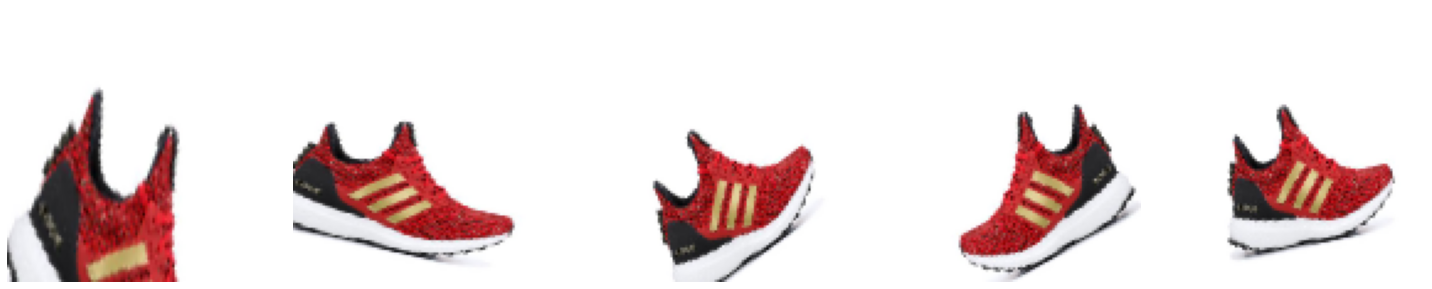

In [10]:
# plot images we obtain using plt library
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augemted_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augemted_images)

In [ ]:
##### build our mobile model #####
mobile = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

Mobile = tf.keras.Sequential([
    mobile,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
Mobile.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our mobilenet model #####
history = Mobile.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
28/28 [==============================] - 56s 2s/step - loss: 0.6286 - accuracy: 0.6555 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 51s 2s/step - loss: 0.5273 - accuracy: 0.7299 - val_loss: 0.7785 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 51s 2s/step - loss: 0.5291 - accuracy: 0.7299 - val_loss: 0.8879 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 51s 2s/step - loss: 0.4935 - accuracy: 0.7724 - val_loss: 0.9971 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 51s 2s/step - loss: 0.4910 - accuracy: 0.7634 - val_loss: 1.0167 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 51s 2s/step - loss: 0.4767 - accuracy: 0.7701 - val_loss: 1.1591 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 51s 2s/step - loss: 0.4860 - accuracy: 0.7735 - val_loss: 1.4141 - val_accuracy: 0.5000
Epoch 8/10
28/28 [==

In [ ]:
##### build our mobile2 model #####
mobile2 = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

Mobile2 = tf.keras.Sequential([
    mobile2,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
Mobile2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our mobilenet model #####
history = Mobile2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
 6/28 [=====>........................] - ETA: 3:17 - loss: 0.7899 - accuracy: 0.5417

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 446s 16s/step - loss: 0.6254 - accuracy: 0.6667 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 54s 2s/step - loss: 0.5568 - accuracy: 0.7394 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 57s 2s/step - loss: 0.4908 - accuracy: 0.7584 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 55s 2s/step - loss: 0.4824 - accuracy: 0.7690 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 52s 2s/step - loss: 0.4602 - accuracy: 0.7914 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 56s 2s/step - loss: 0.4396 - accuracy: 0.8037 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 53s 2s/step - loss: 0.4393 - accuracy: 0.7975 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 8/10
28/28 [===========

In [ ]:
##### build our densenet1 model #####
densenet1 = tf.keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

Dense1 = tf.keras.Sequential([
    densenet1,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
Dense1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = Dense1.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/28 [=========>....................] - ETA: 26s - loss: 0.6499 - accuracy: 0.6734

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 69s 2s/step - loss: 0.5704 - accuracy: 0.7198 - val_loss: 16.6174 - val_accuracy: 0.4614
Epoch 2/10
28/28 [==============================] - 50s 2s/step - loss: 0.5102 - accuracy: 0.7506 - val_loss: 0.6308 - val_accuracy: 0.6727
Epoch 3/10
28/28 [==============================] - 51s 2s/step - loss: 0.5055 - accuracy: 0.7562 - val_loss: 0.5703 - val_accuracy: 0.6909
Epoch 4/10
28/28 [==============================] - 51s 2s/step - loss: 0.4776 - accuracy: 0.7673 - val_loss: 0.6304 - val_accuracy: 0.6795
Epoch 5/10
28/28 [==============================] - 50s 2s/step - loss: 0.4547 - accuracy: 0.7886 - val_loss: 1.1125 - val_accuracy: 0.6068
Epoch 6/10
28/28 [==============================] - 50s 2s/step - loss: 0.4744 - accuracy: 0.7802 - val_loss: 0.7485 - val_accuracy: 0.6659
Epoch 7/10
28/28 [==============================] - 50s 2s/step - loss: 0.4665 - accuracy: 0.7763 - val_loss: 0.6868 - val_accuracy: 0.6636
Epoch 8/10
28/28 [============

In [ ]:
##### build our densenet2 model #####
densenet2 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

Dense2 = tf.keras.Sequential([
    densenet2,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
Dense2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = Dense2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
 6/28 [=====>........................] - ETA: 2:51 - loss: 1.0952 - accuracy: 0.5755

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 385s 13s/step - loss: 0.6932 - accuracy: 0.6963 - val_loss: 21.1938 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 53s 2s/step - loss: 0.5296 - accuracy: 0.7405 - val_loss: 4.9987 - val_accuracy: 0.4409
Epoch 3/10
28/28 [==============================] - 53s 2s/step - loss: 0.5072 - accuracy: 0.7562 - val_loss: 4.7539 - val_accuracy: 0.4818
Epoch 4/10
28/28 [==============================] - 53s 2s/step - loss: 0.5091 - accuracy: 0.7567 - val_loss: 0.6150 - val_accuracy: 0.6636
Epoch 5/10
28/28 [==============================] - 53s 2s/step - loss: 0.5020 - accuracy: 0.7556 - val_loss: 0.5708 - val_accuracy: 0.7068
Epoch 6/10
28/28 [==============================] - 53s 2s/step - loss: 0.5093 - accuracy: 0.7573 - val_loss: 0.6279 - val_accuracy: 0.6727
Epoch 7/10
28/28 [==============================] - 53s 2s/step - loss: 0.4792 - accuracy: 0.7713 - val_loss: 0.5907 - val_accuracy: 0.7182
Epoch 8/10
28/28 [==========

In [ ]:
##### build our nasnetmobile model #####
nasnetmobile = tf.keras.applications.NASNetMobile(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

Nasnetmobile = tf.keras.Sequential([
    nasnetmobile,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
Nasnetmobile.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = Nasnetmobile.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
 2/28 [=>............................] - ETA: 46s - loss: 0.8413 - accuracy: 0.5859  

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 85s 2s/step - loss: 0.6105 - accuracy: 0.7181 - val_loss: 1.2327 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 54s 2s/step - loss: 0.4776 - accuracy: 0.7836 - val_loss: 1.0602 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 54s 2s/step - loss: 0.4529 - accuracy: 0.7953 - val_loss: 1.2810 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 54s 2s/step - loss: 0.4290 - accuracy: 0.8121 - val_loss: 1.2098 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 54s 2s/step - loss: 0.4292 - accuracy: 0.8082 - val_loss: 2.1314 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 55s 2s/step - loss: 0.3977 - accuracy: 0.8305 - val_loss: 0.8947 - val_accuracy: 0.5432
Epoch 7/10
28/28 [==============================] - 55s 2s/step - loss: 0.4269 - accuracy: 0.8020 - val_loss: 1.1883 - val_accuracy: 0.4182
Epoch 8/10
28/28 [=============

In [ ]:
##### build our Xception model #####
xception = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

X = tf.keras.Sequential([
    xception,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
X.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = X.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
 6/28 [=====>........................] - ETA: 36s - loss: 1.0136 - accuracy: 0.5755

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 65s 2s/step - loss: 0.6502 - accuracy: 0.6952 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 56s 2s/step - loss: 0.5067 - accuracy: 0.7534 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 56s 2s/step - loss: 0.4750 - accuracy: 0.7774 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 56s 2s/step - loss: 0.4524 - accuracy: 0.7875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 56s 2s/step - loss: 0.4374 - accuracy: 0.7975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 55s 2s/step - loss: 0.4438 - accuracy: 0.7942 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 55s 2s/step - loss: 0.3953 - accuracy: 0.8238 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 8/10
28/28 [=============

In [ ]:
##### build our Inception model #####
inception = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

inceptionv3 = tf.keras.Sequential([
    inception,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
inceptionv3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = inceptionv3.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 61s 2s/step - loss: 0.7896 - accuracy: 0.6946 - val_loss: 0.8529 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 49s 2s/step - loss: 0.5199 - accuracy: 0.7634 - val_loss: 1.6872 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 49s 2s/step - loss: 0.4988 - accuracy: 0.7740 - val_loss: 0.8408 - val_accuracy: 0.5341
Epoch 4/10
28/28 [==============================] - 49s 2s/step - loss: 0.4628 - accuracy: 0.7847 - val_loss: 1.2253 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 50s 2s/step - loss: 0.4502 - accuracy: 0.8048 - val_loss: 2.5780 - val_accuracy: 0.5023
Epoch 6/10
28/28 [==============================] - 50s 2s/step - loss: 0.4341 - accuracy: 0.8104 - val_loss: 1.2363 - val_accuracy: 0.5386
Epoch 7/10
28/28 [==============================] - 50s 2s/step - loss: 0.4600 - accuracy: 0.7864 - val_loss: 0.9848 - val_accuracy: 0.4932
Epoch 8/10
28/28 [=============

In [ ]:
##### build our resnet model #####
resnet = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

res = tf.keras.Sequential([
    resnet,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
res.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = res.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
11/28 [==========>...................] - ETA: 26s - loss: 1.5126 - accuracy: 0.6014

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 61s 2s/step - loss: 0.9872 - accuracy: 0.6628 - val_loss: 5.0254 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 51s 2s/step - loss: 0.5733 - accuracy: 0.7455 - val_loss: 0.8474 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 52s 2s/step - loss: 0.5182 - accuracy: 0.7629 - val_loss: 1.2988 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 53s 2s/step - loss: 0.5036 - accuracy: 0.7685 - val_loss: 0.8994 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 51s 2s/step - loss: 0.5011 - accuracy: 0.7685 - val_loss: 1.3483 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 52s 2s/step - loss: 0.5043 - accuracy: 0.7651 - val_loss: 1.6395 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 52s 2s/step - loss: 0.4753 - accuracy: 0.7729 - val_loss: 1.7065 - val_accuracy: 0.5000
Epoch 8/10
28/28 [=============

In [ ]:
##### build our vgg model #####
vgg = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

vgg16 = tf.keras.Sequential([
    vgg,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
vgg16.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = vgg16.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 59s 2s/step - loss: 0.8340 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 52s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 52s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 51s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 51s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
28/28 [==============================] - 51s 2s/step - loss: 0.6932 - accuracy: 0.4664 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 51s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
28/28 [=============

In [ ]:
##### build our incepres model #####
incepres = tf.keras.applications.InceptionResNetV2(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
# dense1 = tf.keras.layers.Dense(128,activation='relu')
# dense2 = tf.keras.layers.Dense(64,activation='relu')
prediction_layer = layers.Dense(1,activation='sigmoid')

InceptionRes = tf.keras.Sequential([
    incepres,
    global_average_layer,
    # dense1,
    # dense2,
    prediction_layer                 
])
InceptionRes.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = InceptionRes.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
13/28 [============>.................] - ETA: 23s - loss: 1.0715 - accuracy: 0.6514

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 80s 2s/step - loss: 0.7782 - accuracy: 0.7092 - val_loss: 0.8891 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 53s 2s/step - loss: 0.4791 - accuracy: 0.7724 - val_loss: 1.2729 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 53s 2s/step - loss: 0.4639 - accuracy: 0.7824 - val_loss: 1.1823 - val_accuracy: 0.5000
Epoch 4/10
28/28 [==============================] - 53s 2s/step - loss: 0.4536 - accuracy: 0.7919 - val_loss: 0.7229 - val_accuracy: 0.5318
Epoch 5/10
28/28 [==============================] - 53s 2s/step - loss: 0.4469 - accuracy: 0.7802 - val_loss: 0.6819 - val_accuracy: 0.5318
Epoch 6/10
28/28 [==============================] - 53s 2s/step - loss: 0.4167 - accuracy: 0.8171 - val_loss: 1.2645 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 53s 2s/step - loss: 0.4210 - accuracy: 0.8115 - val_loss: 1.7190 - val_accuracy: 0.5000
Epoch 8/10
28/28 [=============

In [12]:
!pip install numpy==1.19.1
!pip install tensorflow-gpu==1.14.0
!pip install keras==2.2.5

     |████████████████████████████████| 377.1 MB 8.7 kB/s 


In [11]:
!pip install 'h5py==2.10.0'

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [1]:
import keras
import os
from keras import layers,models,optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import *   
from keras.models import Sequential, Model
import keras.backend as K
from keras import regularizers
from keras.applications.xception import Xception,preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pylab as plt
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import sys
import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras as ke
from keras.preprocessing.image import img_to_array, ImageDataGenerator#图片转为array
from keras.utils import to_categorical#相当于one-hot
from imutils import paths
import cv2
import numpy as np
import random
import os
from keras.callbacks import TensorBoard, ModelCheckpoint



Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12380508198277039639
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17664456394706436586
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17454845539600714861
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14949928141
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17587336748471971563
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [3]:
seed = 42

os.environ['PYTHONHASHSEED']=str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['HOROVOD_FUSION_THRESHOLD']='0'
random.seed(seed)
np.random.seed(seed)
tf.random.set_random_seed(seed)
tf.set_random_seed(seed)

In [11]:
# 配置项目参数
channel = 3
height = 112 #300
width = 112 #400
class_num = 2 # 4
#norm_size = 32#参数
batch_size = 32
epochs = 50
sgd = SGD(lr=1e-4,momentum=0.9) # 模型微调时使用 lr=1e-4, 模型直接训练时 lr=0.1
rmsprop_ = 'rmsprop'
FINE_LAYER = 'block5_conv1' # conv2d_73
FREEZED_LAYER = 'MaxPooling2D' #flatten max_pooling2d_5


train_dir = './drive/MyDrive/daydayup/dataset/sneaker_nonsneaker/sneaker_nonsneaker/training' # ../data/dataset/train
validation_dir = './drive/MyDrive/daydayup/dataset/sneaker_nonsneaker/sneaker_nonsneaker/testing' # ../data/dataset/val
save_tl_dir = "./drive/MyDrive/daydayup/Morpho/predict/TLCheckpoint"
save_ft_dir = "./drive/MyDrive/daydayup/Morpho/predict/FTCheckpoint"
save_Direct_dir = "../predict/DirectCheckpoint"
tl_best_model_path = os.path.join(save_tl_dir, 'TL_model_32-0.95.hdf5')

totalTrain = len(list(paths.list_images(train_dir)))
totalVal = len(list(paths.list_images(validation_dir)))
print(totalTrain)

NetworkName = "VGG16"

JudgeFreezing = True
JudgeSaveRecord = False
switchCard = True # default:True, if change it to False, the network will not unfreezing after training with freezed conv_base

1788


In [5]:
def dataprocess(train_dir, validation_dir,height, width, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(height, width),
        batch_size= batch_size,
        class_mode='categorical')
    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        batch_size= 32,
        class_mode='categorical')
    return train_generator, validation_generator

In [6]:
train_generator, validation_generator = dataprocess(train_dir, validation_dir, height, width, batch_size)

Found 1788 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [7]:
# 定义特征提取
def setupTransferLearning(model, choOpt, freezedLayer):
    for layer in model.layers:
        layer.trainable = True
    set_trainable = False
    for layer in model.layers:
        if layer.name == freezedLayer:
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    for layer in model.layers:
        print("{}: {}".format(layer, layer.trainable))
    model.compile(loss="categorical_crossentropy",
            optimizer=choOpt,metrics=["accuracy"])#配置

# 定义模型微调
def setupFineTune(model, choOpt, fineLayer):
    for layer in model.layers:
        layer.trainable = True
    set_trainable = False
    for layer in model.layers:
        if layer.name == fineLayer:
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    for layer in model.layers:
        print("{}: {}".format(layer, layer.trainable))
    model.compile(loss="categorical_crossentropy",
            optimizer=choOpt,metrics=["accuracy"])#配置

# 绘制训练结果的图表
def plotResult(epochs, _history):
    plt.style.use("ggplot")#matplotlib的美化样式
    plt.figure()
    N = epochs
    plt.plot(np.arange(0,N),_history.history["loss"],label ="train_loss")#model的history有四个属性，loss,val_loss,acc,val_acc
    plt.plot(np.arange(0,N),_history.history["val_loss"],label="val_loss")
    plt.plot(np.arange(0,N),_history.history["acc"],label="train_acc")
    plt.plot(np.arange(0,N),_history.history["val_acc"],label="val_acc")
    plt.title("loss and accuracy")
    plt.xlabel("epoch")
    plt.ylabel("loss/acc")
    plt.legend(loc="best")
    plt.savefig("./drive/MyDrive/daydayup/Morpho/result/result.png")
    plt.show()


In [8]:
class changeVGG16:

    def neural(channel,height,width,classes):
        input_shape = (channel,height,width)
        if K.image_data_format() == "channels_last":#确认输入维度
            input_shape = (height,width,channel)

        conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
        x = conv_base.output

        UpSample = MaxPooling2D(pool_size=(9, 9), strides=(1, 1),padding = 'same', name='MaxPooling2D')(x)
        UpSample = Dropout(0.5)(UpSample)
        UpSample = Conv2D(256,(1,1))(UpSample)
        UpSample = BatchNormalization()(UpSample)
        UpSample = Activation('relu')(UpSample)
        UpSample = Dropout(0.5)(UpSample)
        UpSample = Conv2D(64,(1,1))(UpSample)
        UpSample = BatchNormalization()(UpSample)
        UpSample = Activation('relu')(UpSample)
        UpSample = Dropout(0.5)(UpSample)
        UpSample = Flatten(name='flatten')(UpSample)
        UpSample = Dense(classes)(UpSample)
        UpSample = BatchNormalization()(UpSample)
        predictions = Activation('softmax')(UpSample)

        model = Model(inputs=conv_base.input, outputs=predictions)
        

        return model

In [9]:
    model = changeVGG16.neural(channel=channel, height=height,
                        width=width, classes=class_num)#网络
    model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
___

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0   

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/55 [==============================] - 30s 542ms/step - loss: 0.2291 - acc: 0.9033 - val_loss: 0.1975 - val_acc: 0.9231

Epoch 00001: val_acc improved from -inf to 0.92308, saving model to ./drive/MyDrive/daydayup/Morpho/predict/FTCheckpoint/FT_model_01-0.92.hdf5
Epoch 2/50
55/55 [==============================] - 31s 561ms/step - loss: 0.2263 - acc: 0.9072 - val_loss: 0.1834 - val_acc: 0.9338

Epoch 00002: val_acc improved from 0.92308 to 0.93382, saving model to ./drive/MyDrive/daydayup/Morpho/predict/FTCheckpoint/FT_model_02-0.93.hdf5
Epoch 3/50
55/55 [==============================] - 30s 552ms/step - loss: 0.2177 - acc: 0.9170 - val_loss: 0.1945 - val_acc: 0.9191

Epoch 00003: val_acc did not improve from 0.93382
Epoch 4/50
55/55 [==============================] - 30s 543ms/step - loss: 0.1814 - acc: 0.9241 - val_loss: 0.1817 - val_acc: 0.9314

Epoch 00004: val_acc did not improve from 0.93382
Epoch 5/50
55/55 [==============================] - 29s 527ms/step - loss: 0.2058 - ac

FileNotFoundError: ignored

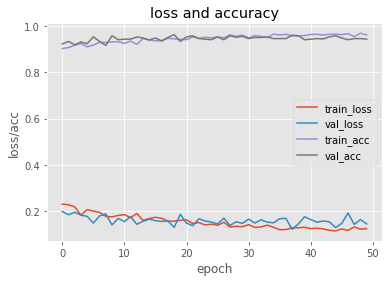

In [12]:
if NetworkName == "VGG16":
    model = changeVGG16.neural(channel=channel, height=height,
                        width=width, classes=class_num)#网络
    model.summary()
    if switchCard == False:
        setupTransferLearning(model, rmsprop_, FREEZED_LAYER)
        checkpointerTL = ModelCheckpoint(os.path.join(save_tl_dir, 'TL_model_{epoch:02d}-{val_acc:.2f}.hdf5'),
                                verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=False, period=1)
        _history = model.fit_generator(
            train_generator,
            steps_per_epoch=totalTrain // batch_size,
            epochs = epochs, 
            validation_data=validation_generator,
            validation_steps=totalVal // 32, # RedDate 32 Polen 64
            callbacks=[checkpointerTL])  
        history_dict = _history.history
        print(history_dict.keys())
    elif switchCard == True:
        model = load_model(tl_best_model_path)
        setupFineTune(model, sgd, FINE_LAYER)
        #Using tensorboard version
        tbCallback = TensorBoard(log_dir="../result/tbResult", histogram_freq=0, write_grads=True)
        checkpointerFT = ModelCheckpoint(os.path.join(save_ft_dir, 'FT_model_{epoch:02d}-{val_acc:.2f}.hdf5'),
                                verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=False, period=1)
        _history = model.fit_generator(
            train_generator,
            steps_per_epoch=totalTrain // batch_size,
            epochs = epochs,
            validation_data=validation_generator,
            validation_steps=totalVal // 32,
            callbacks=[tbCallback, checkpointerFT]) 

        history_dict = _history.history
        print(history_dict.keys())
        plotResult(epochs, _history)